# Giới thiệu chung


Sự phổ biến của điện thoại thông minh cho phép mọi người thông báo trường hợp khẩn cấp mà họ đã quan sát thấy trong thời gian thực. Do đó, nhiều tổ chức quan tâm đến việc theo dõi Twitter với tư cách là chương trình. Nhưng không phải lúc nào lời nói của một người cũng thực sự thông báo về thảm họa. Ví dụ:
Tác giả rõ ràng sử dụng từ "ABLAZE" nhưng nó mang nghĩa ẩn dụ. điều này là rõ ràng cho mọi người ngay lập tức. đặc biệt là với sự trợ giúp trực quan. Nhưng nó ít rõ ràng hơn đối với máy

# Quá trình khám phá dữ liệu

## Khai báo các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter
import seaborn as sns

In [2]:
import nltk
from nltk.corpus import stopwords, wordnet
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Đọc dữ liệu và tính số dòng, cột

In [ ]:
df_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
df_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
df_sample_sub = pd.read_csv('/kaggle/input/nlp-getting-started/sample_submission.csv')

In [6]:
df_train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [7]:
df_test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [8]:
df_sample_sub

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


### Tính số dòng và cột

In [9]:
print("Number of rows of data 'train.csv': ", df_train.shape[0])
print("Number of columns of data 'train.csv': ", df_train.shape[1])

Number of rows of data 'train.csv':  7613
Number of columns of data 'train.csv':  5


In [10]:
print("Number of rows of data 'test.csv': ", df_test.shape[0])
print("Number of columns of data 'test.csv': ", df_test.shape[1])

Number of rows of data 'test.csv':  3263
Number of columns of data 'test.csv':  4


In [11]:
print("Number of rows of data 'sample_submission.csv': ", df_sample_sub.shape[0])
print("Number of columns of data 'sample_submission.csv': ", df_sample_sub.shape[1])

Number of rows of data 'sample_submission.csv':  3263
Number of columns of data 'sample_submission.csv':  2


## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau hay không?

Mỗi dòng là thông tin về 1 đoạn tweet, bao gồm keyword, location và nội dung đoạn tweet đó.

Ở file train có thêm target cho biết đoạn tweet đó có phải đang đề cập đến một thiên tai hay một thảm họa nào đó đang xảy ra hay không

Vì vậy, dường như không có khả năng các dòng có ý nghĩa khác nhau

## Dữ liệu có dòng nào bị lặp không?

In [12]:
df_train.duplicated().sum()

0

In [13]:
df_test.duplicated().sum()

0

Vì tất cả các bài đăng đều được mang một `id` riêng biệt nên sẽ không có trùng lặp dữ liệu nếu ta chỉ dùng *duplicated()* cho tất cả các cột dữ liệu. Đây là những bài đăng trên Twitter nên sẽ không thể tránh khỏi việc các bài đăng được người dùng chia sẽ lại hoặc copy lại nên ta sẽ kiểm tra thử các bài đăng nào trùng nhau bằng cách thêm thuộc tính subset ở hàm *duplicated()*:

In [14]:
df_train.duplicated(subset='text').sum()

110

Như vậy có tất cả 110 bài đăng có nội dung bị trùng lặp nhau. Đó là những bài đăng sau:

In [15]:
df_train[df_train.duplicated(subset='text')]

,id,keyword,location,text,target
48,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0
115,165,aftershock,US,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/vA...,0
119,172,aftershock,Switzerland,320 [IR] ICEMOON [AFTERSHOCK] | http://t.co/TH...,0
164,238,airplane%20accident,NaN,Experts in France begin examining airplane deb...,1
624,898,bioterrorism,NaN,To fight bioterrorism sir.,0
...,...,...,...,...,...
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1


## Kiểu dữ liệu của mỗi cột

In [16]:
df_train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [17]:
df_test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

In [18]:
df_sample_sub.dtypes

id        int64
target    int64
dtype: object

Nhận thấy rằng kiểu dữ liệu trong ở cả file train và test đều đã ở định dạng phù hợp

## Tỉ lệ giá trị thiếu của mỗi cột

### Data `train.csv`

In [19]:
null_data = df_train.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = df_train.isnull().sum() * 100 / len(df_train)
null_data.style

,Miss values,Miss values percentage %
id,0,0.000000
keyword,61,0.801261
location,2533,33.272035
text,0,0.000000
target,0,0.000000


### Data `test.csv`

In [20]:
null_data = df_test.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = df_test.isnull().sum() * 100 / len(df_test)
null_data.style

,Miss values,Miss values percentage %
id,0,0.000000
keyword,26,0.796813
location,1105,33.864542
text,0,0.000000


## Trực quan hóa

### Biểu diễn tỉ lệ các giá trị của thuộc tính _`target`_ trong `train.csv`

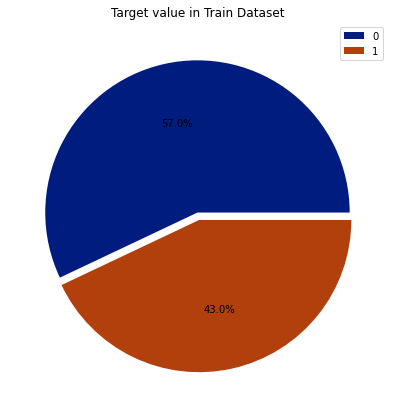

In [21]:
plt.figure(figsize=(30,7))
plt.pie(df_train['target'].value_counts(),startangle=0,autopct='%1.1f%%',explode=[0,0.05],colors=sns.color_palette('dark'))
plt.legend(df_train['target'].value_counts().index)
plt.title("Target value in Train Dataset")
plt.show()

#### Nhận xét:
- Tỉ lệ bài đăng không phải là tai nạn hay thảm họa cao hơn không nhiều.

### Top 10 giá trị _`keyword`_ xuất hiện phổ biến nhất trong `train.csv`

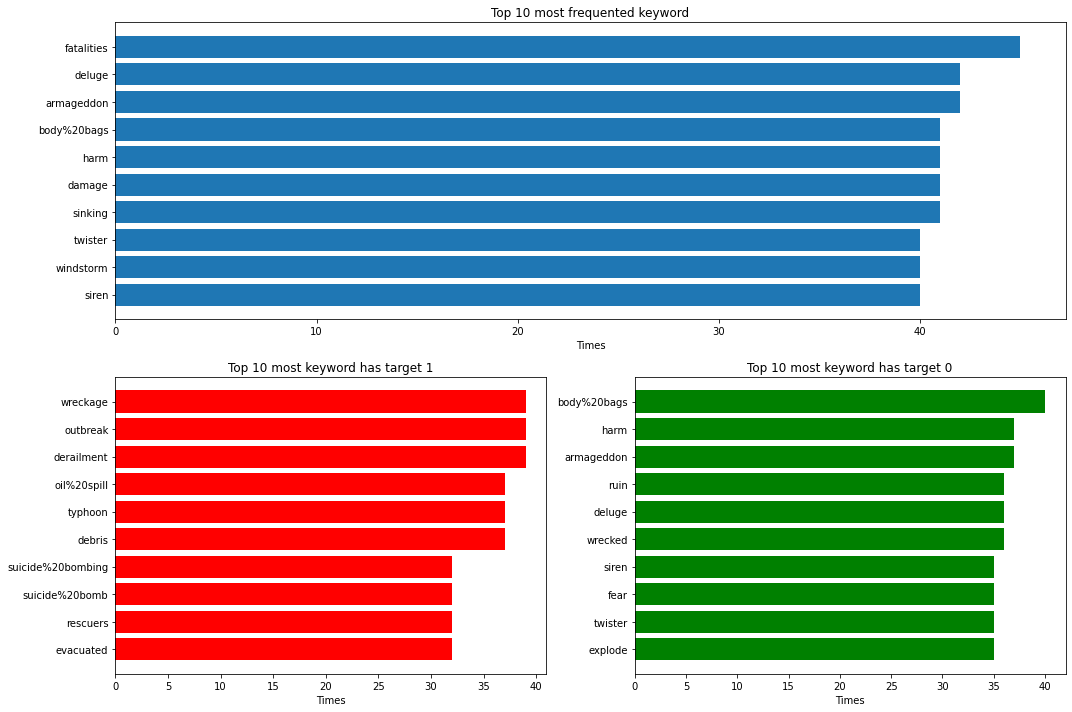

In [22]:
#Top 10 giá trị keyword xuất hiện phổ biến nhất
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.barh(df_train.keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train.keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values)
ax1.set_title("Top 10 most frequented keyword")
ax1.set_xlabel("Times")

#Top 10 keyword về tai nạn hay thảm họa xuất hiện phổ biến nhất
ax2 = fig.add_subplot(2,2,3)
ax2.barh(df_train[df_train['target'] == 1].keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 1].keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values, 
         color='r')
ax2.set_title("Top 10 most keyword has target 1")
ax2.set_xlabel("Times")

#Top 10 keyword mà không phải nói về tai nạn hay khủng hoảng xuất hiện phổ biến nhất
ax3 = fig.add_subplot(2,2,4)
ax3.barh(df_train[df_train['target'] == 0].keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 0].keyword.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values, 
         color='g')
ax3.set_title("Top 10 most keyword has target 0")
ax3.set_xlabel("Times")
plt.tight_layout()

#### Nhận xét:
- *fatalities* là `keyword` có số lần xuất hiện thường xuyên cao nhất là 45
- *derailment*, *wreckage* và *outbreak* là những `keyword` có số lần xuất hiện thường xuyên cao nhất của `target` = 1 là 39
- *body20%bags* Keyword có số lần xuất hiện thường xuyên cao nhất của `target` = 0 là 40
- Có những giá trị keyword thường xuyên xuất hiện nhưng không nằm trong top 10 những giá trị thường xuyên xuất hiện có giá trị `target` = 0 hoặc `target` = 1: *fatalities*, *damage*, *sinking*, *winstorm*.

--> Giá trị `keyword` đa dạng, có nhiều giá trị `keyword` nghiêng hẳn về phía của một `target`

### Top 10 giá trị _`keyword`_ xuất hiện ít phổ biến nhất trong `train.csv`

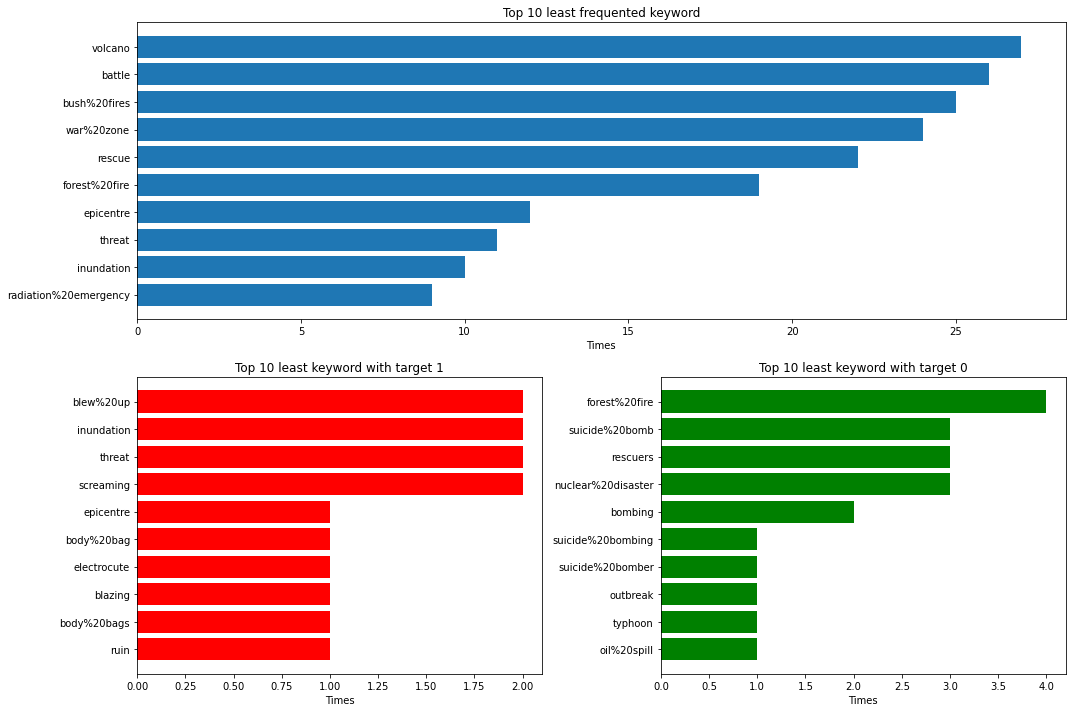

In [23]:
#Top 10 giá trị keyword xuất hiện ít phổ biến nhất
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.barh(df_train.keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).index,
         df_train.keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).values)
ax1.set_title("Top 10 least frequented keyword")
ax1.set_xlabel("Times")

#Top 10 keyword về tai nạn hay thảm họa xuất hiện ít phổ biến nhất
ax2 = fig.add_subplot(2,2,3)
ax2.barh(df_train[df_train['target'] == 1].keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 1].keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).values,
         color='r')
ax2.set_title("Top 10 least keyword with target 1")
ax2.set_xlabel("Times")

#Top 10 keyword mà không phải nói về tai nạn hay khủng hoảng xuất hiện ít phổ biến nhất
ax3 = fig.add_subplot(2,2,4)
ax3.barh(df_train[df_train['target'] == 0].keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 0].keyword.value_counts().sort_values(ascending=True).head(10).sort_values(ascending=True).values, 
         color='g')
ax3.set_title("Top 10 least keyword with target 0")
ax3.set_xlabel("Times")
plt.tight_layout()

#### Nhận xét:
- *radiation%20emergency* `keyword` có số lần xuất hiện thấp nhất là 9
- *ruin*, *electrocute*, *body%20bag*, *epicentre*, *blazing* và *body%20bags* là những `keyword` có số lần xuất hiện thấp nhất với `target` = 1 là 1
- *oil%20spill*, *outbreak*, *suicide%20bomber*, *suicide%20bombing* và *typhoon* là những `keyword` có số lần xuất hiện thấp nhất với `target` = 0 là 1

=> Có nhiều `keyword` có ý nghĩa biểu thị một thảm họa như *typhoon*, *oil%20spill*, *suicide%20bomber*, *suicide%20bombing*, *bombing* nhưng lại nằm ở phía `target` = 0

### Top 10 giá trị _`location`_ xuất hiện phổ biến nhất trong `train.csv`

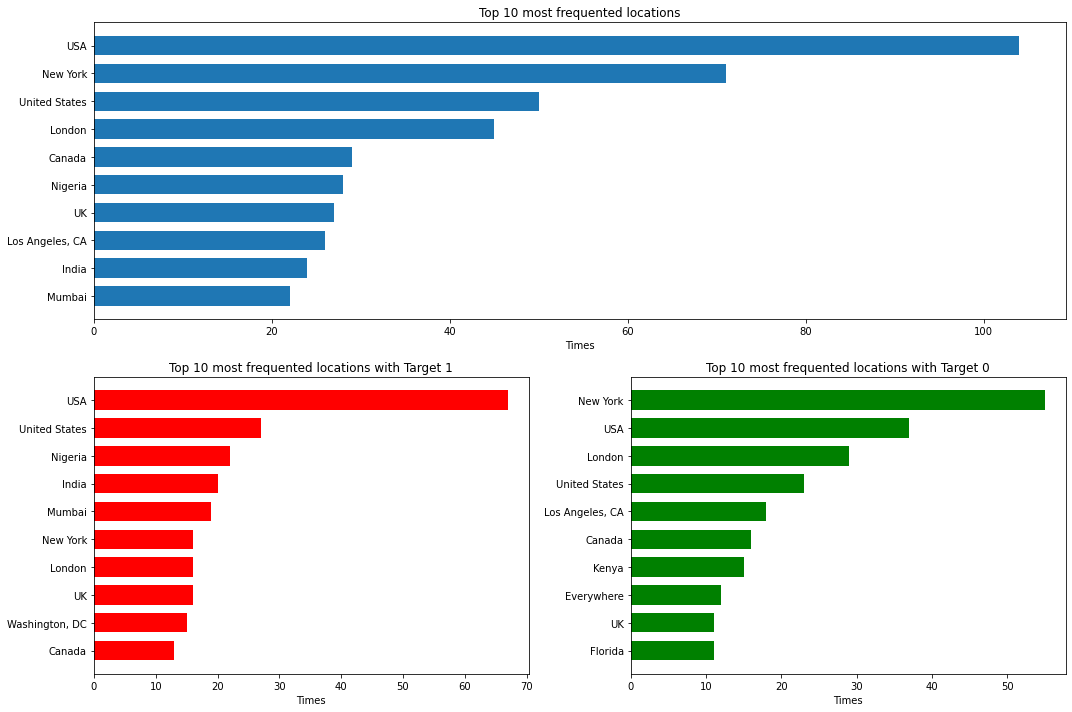

In [24]:
#Top 10 giá trị location xuất hiện phổ biến nhất
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.barh(df_train.location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train.location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values, height=0.7)
ax1.set_title("Top 10 most frequented locations")
ax1.set_xlabel("Times")

#Top 10 location xuất hiện nhiều tai nạn hay thảm họa nhất
ax2 = fig.add_subplot(2,2,3)
ax2.barh(df_train[df_train['target'] == 1].location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 1].location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values, 
         height=0.7, color='r')
ax2.set_title("Top 10 most frequented locations with Target 1")
ax2.set_xlabel("Times")

#Top 10 location ít xuất hiện tai nạn hay thảm họa nhất được đề cập trong dữ liệu
ax3 = fig.add_subplot(2,2,4)
ax3.barh(df_train[df_train['target'] == 0].location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).index,
         df_train[df_train['target'] == 0].location.value_counts().sort_values(ascending=False).head(10).sort_values(ascending=True).values, 
         height=0.7, color='g')
ax3.set_title("Top 10 most frequented locations with Target 0")
ax3.set_xlabel("Times")
plt.tight_layout()
plt.show()

#### Nhận xét:
- Trong top 10 giá trị `location` xuất hiện nhiều nhất thì chủ yếu là các địa điểm ở Mỹ, bên cạnh đó còn có các nước phát triển khác: *Canada*, *United of Kingdom*, *India*. Chỉ có duy nhất 1 nước đang phát triển nằm trong top 10 này là *Nigeria*.
- Địa điểm được nhắc đến nhiều nhất là *USA* với hơn 100 lần
- Trong top 10 giá trị `location` xuất hiện nhiều nhất với giá trị `target` là 1, Mỹ vẫn là quốc gia nhiều nhất.
- Trong top 10 giá trị `location` xuất hiện nhiều nhất với giá trị `target` là 0, Mỹ, cụ thể hơn là *New York* là địa điểm được nhắc đến nhiều nhất*

--> Với nền kinh tế phát triển và cũng là quốc gia có số lượng người sử dụng twiter nhiều nhất cho nên *Mỹ* là quốc gia có số lượt nhắc đến cao nhất. Bên cạnh đó còn có *Ấn Độ* cũng là người có số lượng người dùng đông đảo

### Top 10 hashtag được đề cập tới trong _`text`_

Hàm tạo ra danh sách nối các hashtag được đề cập trong 'text' với nội dung đề cập tới tai nạn hay thảm họa hoặc không, phụ thuộc vào giá trị 'target' (0: không; 1: có)

In [25]:
def count_value(df, target, value):
    hashtag = []
    [hashtag.extend(i) for i in df[df['target'] == target][value]]
    return pd.Series(hashtag)

Tạo ra cột 'hashtag' chứa kết quả tìm kiếm các hashtag xuất hiện trong 'text' và tạo ra danh sách chứa tất cả các hashtag đã xuất hiện (có thể lặp lại)

In [26]:
df_train['hash_tag'] = df_train.text.apply(lambda x: re.findall(r'#[a-zA-Z0-9\.\_\-]+', x.lower()))
hashtag = []
[hashtag.extend(i) for i in df_train['hash_tag']]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

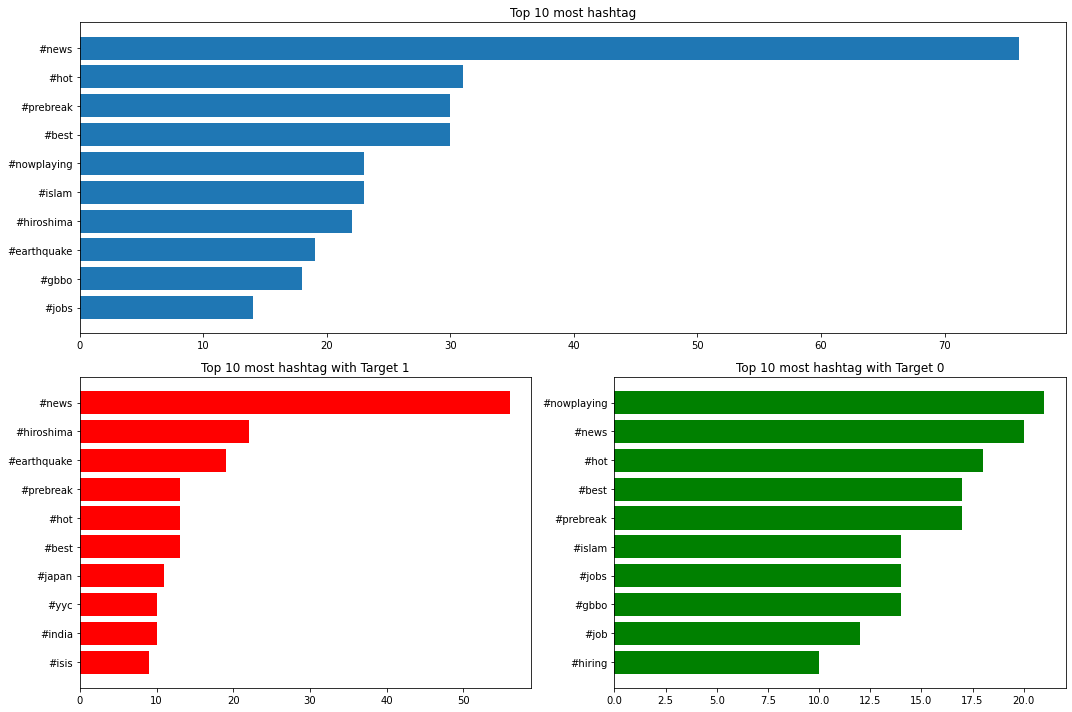

In [27]:
#Top 10 hashtag được đề cập tới nhiều nhất 
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(2,1,1)
ax1.barh(pd.Series(hashtag).value_counts(ascending=True).tail(10).index, pd.Series(hashtag).value_counts(ascending=True).tail(10).values)
ax1.set_title("Top 10 most hashtag")

#Top 10 hashtag được đề cập tới trong các 'text' nói về tai nạn hay thảm họa
ax2 = fig.add_subplot(2,2,3)
ax2.barh(count_value(df_train, 1,'hash_tag').value_counts().sort_values(ascending=True).tail(
    10).index, count_value(df_train, 1,'hash_tag').value_counts().sort_values(ascending=True).tail(10).values, color='r')
ax2.set_title("Top 10 most hashtag with Target 1")

#Top 10 hashtag được đề cập tới trong các 'text' không phải nói về tai nạn hay thảm họa
ax3 = fig.add_subplot(2,2,4)
ax3.barh(count_value(df_train, 0,'hash_tag').value_counts().sort_values(ascending=True).tail(
    10).index, count_value(df_train, 0,'hash_tag').value_counts().sort_values(ascending=True).tail(10).values, color='g')
ax3.set_title("Top 10 most hashtag with Target 0")
plt.tight_layout()
plt.show()

#### Nhận xét:
- Theo như biểu đồ 1, `hashtag` được nhắc đến nhiều nhất và bỏ xa so với phần còn lại là *news*, cho thấy được người dùng chủ yếu chia sẻ trạng thái liên quan đến tin tức đời sống là nhiều
- Theo như biều đồ 2 (Top 10 most `hashtag` with `target` 1), `hashtag` nhiều nhất là *news* với giá trị lên đến 55/75 lần. Điều đó cho thấy trung bình mỗi bài đăng có `hashtag` *#news* thì có đến 73% liên quan đến sự cố
- Những `hashtag` như *#hiroshima*, *#earthquake* thì 100% đều liên quan đến sự cố
- Theo như biểu đồ 3 (Top 10 most `hashtag` with `target` 0), chủ yếu nội dung là những việc bình thường: *#nowplaying*, *#job*, *#hiring*, ...

# Quá trình tiền xử lý dữ liệu

## Xóa dữ liệu bị lặp

In [28]:
df_train.drop_duplicates(['text'], inplace=True)

## Danh sách từ phổ biến trong tiếng Anh

In [29]:
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Làm sạch dữ liệu ở cột text
Vì đây là những status mà người dùng đăng tải nên chứa nhiều thứ cần phải xử lý trước khi đưa vào để xây dựng mô hình:
- Xóa các đường dẫn được đính kèm trong bài đăng
- Xóa các định dạng tài khoản Twitter
- Xóa các ký tự lạ như: các ký tự lỗi font chữ, các ký tự số bị lẫn trong chữ, các icon như :), :))
- Chuyển các ký tự in hoa thành in thường để đồng nhất trong quá trình xử lý
- Xóa các từ nằm trong stopword vì nó không có nhiều ý nghĩa trong việc xây dựng mô hình:
    - các đại từ nhân xưng: I, We, They, He, She, It
    - các đại từ sở hữu: my, our, their, his, her, its
    - các đại từ phản thân: myself, ourself, themself, himself, herself, itself, ...
    - các mạo từ: a, an, the
    - các đại từ chỉ định: this, that, these, those
    - các động từ phổ biến như: be (is/am/are/was/were/been/being), have (has/had), do (does/did/doing/done), ...
    - Các từ hỏi: what, where, which, who, whom...
    - Các giới từ: of, at, for, with, about...
    - các từ nối: while, until, between, before, after, ...
    - Các từ viết tắt của động từ: 're (are), 'll (will), isn't (is not) ...

In [30]:
def clean_text(text):
    #Chuyển các từ in hoa thành in thường
    text = text.lower()
    
    #Xóa các từ nằm trong danh sách từ phổ biến trong Tiếng Anh.
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    
    #Xóa chuỗi url trong văn bản
    text = re.sub(r'http\S+', '', text)
    
    #Xóa các định dạng tài khoản Twitter <@...>
    text = re.sub(r'@\S+', '', text)
    
    #Chuyển các từ không hợp lệ thành khoảng trắng
    text = re.sub(r"[^a-zA-Z\s]", ' ', text)
    
    return text

Xây dựng hàm chuyển đổi các nhãn từ loại của từ thành nhãn từ loại tương ứng trong WordNet.

In [31]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

Xây dựng hàm xử lý việc chuyển đổi một từ về từ gốc của nó, ví dụ: deeds -> deed, asked -> ask, ...

In [32]:
def restore_text(text):
    #Phân tách câu thành danh sách các từ 
    text = word_tokenize(text)
    
    #Gán nhãn từ loại cho các từ 
    text = nltk.tag.pos_tag(text)
    
    #Chuyển đổi các nhãn từ loại của từ thành nhãn từ loại tương ứng trong WordNet.
    text = [(word, get_wordnet_pos(tag)) for (word,tag) in text]
    
    #Sử dụng WordNetLemmatizer của nltk để lemmatize các từ trong đoạn văn bản dựa trên nhãn từ loại đã được chuyển đổi
    wnl = WordNetLemmatizer()
    text = [wnl.lemmatize(word, tag) for word, tag in text]
    
    #Xóa các từ nằm trong danh sách từ phổ biến trong Tiếng Anh (nếu xuất hiện lại).
    text = ' '.join([word for word in text if word not in stopwords_list])
    
    #Xóa các từ có 1 ký tự
    text = re.sub(r'\b\w\b', '', text)
    
    #Xóa các khoảng trắng thừa giữa 2 từ
    text = re.sub(r'\s+', ' ',text)
    
    #Xóa các khoảng trắng ở đầu và cuối văn bản
    text = text.strip()
    return text

In [33]:
# Xử lý dữ liệu văn bản trong tập df_train
df_train['text'] = df_train['text'].apply(clean_text)
df_train['text'] = df_train['text'].apply(restore_text)
df_train

,id,keyword,location,text,target,hash_tag
0,1,NaN,NaN,deed reason earthquake may allah forgive,1,[#earthquake]
1,4,NaN,NaN,forest fire near la ronge sask canada,1,[]
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1,[]
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1,[#wildfires]
4,7,NaN,NaN,get sent photo ruby alaska smoke wildfires pou...,1,"[#alaska, #wildfires]"
...,...,...,...,...,...,...
7604,10863,NaN,NaN,worldnews fall powerlines link tram update fir...,1,[#worldnews]
7605,10864,NaN,NaN,flip side walmart bomb everyone evacuate stay ...,1,[]
7606,10866,NaN,NaN,suicide bomber kill saudi security site mosque...,1,[]
7608,10869,NaN,NaN,two giant crane hold bridge collapse nearby home,1,[]


In [34]:
# Xử lý dữ liệu văn bản trong tập df_test
df_test['text'] = df_test['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(restore_text)
df_test

,id,keyword,location,text
0,0,NaN,NaN,happen terrible car crash
1,2,NaN,NaN,heard earthquake different city stay safe ever...
2,3,NaN,NaN,forest fire spot pond geese flee across street...
3,9,NaN,NaN,apocalypse light spokane wildfire
4,11,NaN,NaN,typhoon soudelor kill china taiwan
...,...,...,...,...
3258,10861,NaN,NaN,earthquake safety los angeles safety fastener ...
3259,10865,NaN,NaN,storm ri bad last hurricane city amp others ha...
3260,10868,NaN,NaN,green line derailment chicago
3261,10874,NaN,NaN,meg issue hazardous weather outlook hwo


# Quá trình tạo đặc trưng (Features Engineering)|

## Chọn đặc trưng

Vì giá trị ở cột `keyword` (nếu có) xuất hiện lại trong cột `text` có tỉ lệ cao nên có thể ta không cần sử dụng cột `keyword` trong việc xây dựng mô hình dự đoán. Bên cạnh đó, cột `location` có tỉ lệ giá trị thiếu rất cao nên ta có thể không cần sử dụng cột này. Vậy ta chỉ cần giá trị ở cột `text` và `target` để phục vụ việc xây dựng mô hình dự đoán.

In [35]:
df_train.drop(columns=['id', 'keyword', 'location', 'hash_tag'], inplace=True)
df_train

,text,target
0,deed reason earthquake may allah forgive,1
1,forest fire near la ronge sask canada,1
2,resident ask shelter place notify officer evac...,1
3,people receive wildfire evacuation order calif...,1
4,get sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7604,worldnews fall powerlines link tram update fir...,1
7605,flip side walmart bomb everyone evacuate stay ...,1
7606,suicide bomber kill saudi security site mosque...,1
7608,two giant crane hold bridge collapse nearby home,1


## Chuyển dữ liệu văn bản thành ma trận vector
Ở đây ta sẽ sử dụng 2 thư viện `CountVectorizer` và `TfidfVectorizer` để thực hiện thao tác chuyển từ dữ liệu văn bản về dữ liệu số:
1. CountVectorizer: Lớp CountVectorizer chuyển đổi văn bản thành ma trận vector dựa trên tần suất xuất hiện của từng từ trong văn bản. Các bước chính bao gồm:
    - Phân tách văn bản thành các từ đơn (tokenization).
    - Đếm số lần xuất hiện của từng từ trong văn bản (term frequency).
    - Mã hóa tần suất xuất hiện thành ma trận vector.
Ma trận vector thu được sẽ bao gồm các cột tương ứng với các từ trong văn bản và các hàng tương ứng với các văn bản. Giá trị tại mỗi ô trong ma trận sẽ là số lần xuất hiện của từ tương ứng trong văn bản tương ứng.


2. TfidfVectorizer: Lớp TfidfVectorizer chuyển đổi văn bản thành ma trận vector dựa trên giá trị TF-IDF (Term Frequency-Inverse Document Frequency). Các bước chính bao gồm:
    - Phân tách văn bản thành các từ đơn (tokenization).
    - Đếm số lần xuất hiện của từng từ trong văn bản (term frequency).
    - Tính toán giá trị IDF của từng từ trên toàn bộ tập dữ liệu.
    - Kết hợp term frequency và inverse document frequency để tính toán giá trị TF-IDF.
    - Mã hóa giá trị TF-IDF thành ma trận vector.
Ma trận vector thu được sẽ có cùng cấu trúc như CountVectorizer, nhưng giá trị tại mỗi ô sẽ là giá trị TF-IDF của từ tương ứng trong văn bản tương ứng.

### Sử dụng thư viện CountVectorizer

In [36]:
# Chuyển đổi dữ liệu 
count_vectorizer = CountVectorizer()
df_train_countVT = count_vectorizer.fit_transform(df_train['text'])
df_test_countVT = count_vectorizer.transform(df_test['text'])

In [37]:
df_train_countVT.todense().shape, df_test_countVT.todense().shape 

((7503, 11870), (3263, 11870))

In [38]:
# Chia thành tập train và test
X_train_vt, X_test_vt, y_train_vt, y_test_vt = train_test_split(df_train_countVT, df_train['target'], 
                                                                test_size=0.2, random_state=2023)

In [39]:
X_train_vt.todense().shape

(6002, 11870)

### Sử dụng thư viện TfidfVectorizer 

In [40]:
# Chuyển đổi dữ liệu
tfidf=TfidfVectorizer(min_df=2,ngram_range=(1,2))
df_train_tfidf = tfidf.fit_transform(df_train['text'])
df_test_tfidf = tfidf.transform(df_test['text'])

In [41]:
df_train_tfidf.todense().shape, df_test_tfidf.todense().shape

((7503, 10110), (3263, 10110))

In [42]:
# Chia thành tập train và test
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(df_train_tfidf, df_train['target'], 
                                                                            test_size=0.2, random_state=2023)

In [43]:
X_train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

# Xây dựng mô hình

## Lựa chọn mô hình
Chúng ta sử dụng một vài mô hình phân loại phổ biến và nó có khả năng xử lý với dữ liệu văn bản:
1. `Decision Tree Classifier`: Mô hình cây quyết định là một lựa chọn phổ biến để phân loại dữ liệu. Nó dễ hiểu và có khả năng xử lý các đặc trưng dạng số và dạng rời rạc. Nó có khả năng xử lý cả dữ liệu dạng text.

2. `Logistic Regression`: Đây là một mô hình tuyến tính được sử dụng phổ biến trong bài toán phân loại. Nó thích hợp cho các bài toán có đầu ra là nhãn nhị phân (binary classification). Mô hình Logistic Regression cũng có khả năng xử lý dữ liệu dạng text khi được biểu diễn dưới dạng vector.

3. `Support Vector Machine (SVM)`: SVM là một mô hình phân loại mạnh mẽ. Nó tạo ra các đường ranh giới tối ưu để phân loại dữ liệu. SVM có khả năng xử lý cả dữ liệu dạng text thông qua việc biểu diễn dữ liệu dưới dạng vector.

4. `Bernoulli Naive Bayes`: Mô hình Naive Bayes dựa trên giả định độc lập giữa các đặc trưng. Bernoulli Naive Bayes thích hợp cho bài toán phân loại với dữ liệu dạng nhị phân (binary features), như trong trường hợp xử lý dữ liệu văn bản.

5. `Multinomial Naive Bayes`: Mô hình Naive Bayes này thích hợp cho bài toán phân loại với dữ liệu có đặc trưng đếm (count features), như là số lượng từ xuất hiện trong văn bản.

6. `Random Forest Classifier`: Random Forest là một mô hình phân loại dựa trên kết hợp nhiều cây quyết định (decision trees). Nó có khả năng xử lý cả dữ liệu dạng text và dữ liệu có đặc trưng đếm. Mô hình này có khả năng xử lý các tương tác phức tạp giữa các đặc trưng và có khả năng tạo ra dự đoán tốt trong nhiều trường hợp.

In [44]:
seed = 2023
models = [
    DecisionTreeClassifier(random_state=seed),
    LogisticRegression(solver='liblinear', max_iter=1000),
    SVC(random_state=seed),
    BernoulliNB(),
    MultinomialNB(),
    RandomForestClassifier(random_state=seed)
]

## Xây dựng mô hình dự đoán

In [45]:
# Hàm xây dựng mô hình dự đoán
def model_predictions(models, X_train, X_test, y_train, y_test, plot_results=False):
    # Khởi tạo 2 list để lưu accuracy của tập train và tập test của từng mô hình 
    model_name = []
    train_score = []
    test_score = []
    
    # Duyệt từng model để fit tập dữ liệu và tính toán độ chính xác (accuracy_score) của tập train và test mà model dự đoán được 
    for model in models:
        model.fit(X_train, y_train)
        X_train_pred = model.predict(X_train)
        X_test_pred = model.predict(X_test)
        a = accuracy_score(y_train, X_train_pred)*100
        b = accuracy_score(y_test, X_test_pred)*100
        model_name.append(model.__class__.__name__)
        train_score.append(a)
        test_score.append(b)

    # Tạo dataframe lưu tên model, giá trị accuracy_score trên tập train và test
    dt = {'Model name':model_name,
          'Training score':train_score,
          'Testing score':test_score}
    df = pd.DataFrame(dt)
    
    # Trực quan hóa dataframe trên
    if plot_results:
        ax = df.plot.bar(x='Model name', y=['Training score', 'Testing score'], figsize=(16, 6), colormap='Set1')
        # Ghi giá trị trên đỉnh mỗi cột
        for p in ax.patches:
            ax.annotate(str(p.get_height().round(3)), (p.get_x() + p.get_width() / 2, p.get_height()),
                        ha='center', va='bottom')
        plt.title('Performance Visualization of Different Models')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

## Thử nghiệm mô hình

### Thử nghiệm trên tập dữ liệu được chuyển đổi bằng CountVectorizer

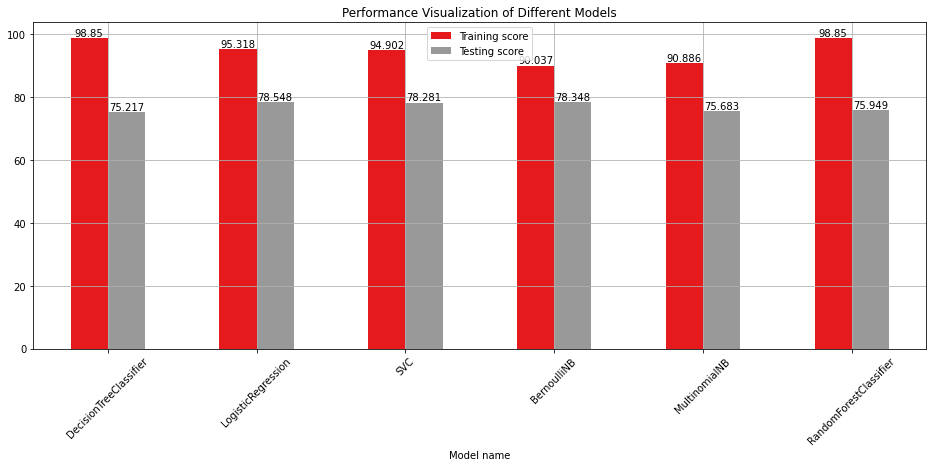

In [46]:
model_predictions(models, X_train_vt, X_test_vt, y_train_vt, y_test_vt, plot_results=True)

### Nhận xét:
- Có vẻ tất cả các mô hình đều không thể có kết quả dự đoán chính xác vượt quá 80% trên tập Test. Chứng tỏ các mô hình này vẫn chưa tối ưu để dự đoán bài toán này.
- Ta có thể thấy tỉ lệ dự đoán chính xác trên tập Test của mô hình `LogisticRegression` là cao nhất và xếp sau là `BernoulliNB` và `SVC` cao ~78%, mặc dù tỉ lệ dự đoán trên tập Train là không phải cao nhất.
- Mặc dù tỉ lệ dự đoán chính xác của mô hình `DecisionTreeClassifier` và `RandomForestClassifier` trên tập Train tiệm cận 100% nhưng nó lại có độ chính xác thấp nhất so với các mô hình còn lại trên tập Test (~75%).
- Mô hình `MultinominalNB` cũng có độ chính xác tương tự như 2 mô hình `DecisionTreeClassifier` và `RandomForestClassifier`: ~75%

### Thử nghiệm trên tập dữ liệu được chuyển đổi bằng TfidfVectorizer 

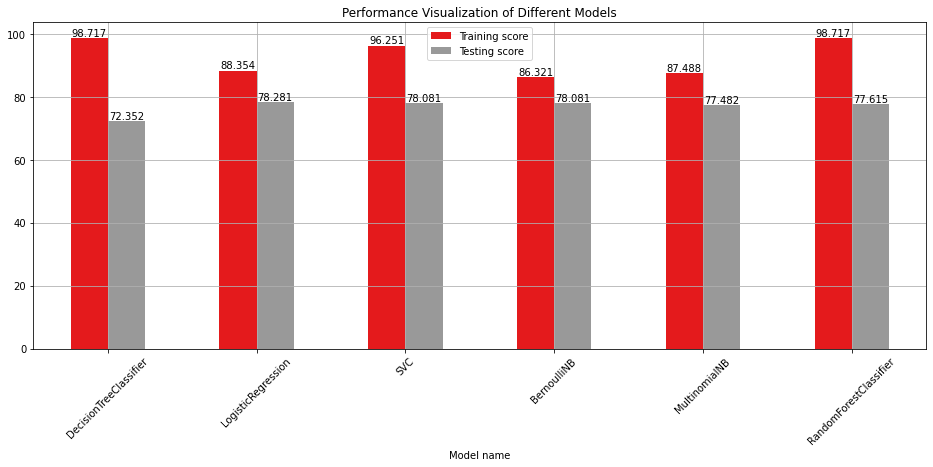

In [47]:
model_predictions(models, X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf, plot_results=True)

### Nhận xét:
- Có vẻ tất cả các mô hình đều không thể có kết quả dự đoán chính xác vượt quá 80% trên tập Test. Chứng tỏ các mô hình này vẫn chưa tối ưu để dự đoán bài toán này.
- Ta có thể thấy tỉ lệ dự đoán chính xác trên tập Test của mô hình `LogisticRegression` là cao nhất và xếp sau là `BernoulliNB` và `SVC` cao ~78%, mặc dù tỉ lệ dự đoán trên tập Train là không phải cao nhất.
- Mặc dù tỉ lệ dự đoán chính xác của mô hình `DecisionTreeClassifier` và `RandomForestClassifier` trên tập Train tiệm cận 100% nhưng nó lại có độ chính xác thấp nhất so với các mô hình còn lại trên tập Test.

# Kết luận và hướng phát triển


Dựa theo 2 kết quả ở trên thì ta có thể lựa chọn được 4 mô hình có kết quả dự đoán cao nhất. Đó là `BernoulliNB`, `MultinominalNB`, `SVC` và `LogisticRegression`. Chúng ta tiến hành sử dụng từng mô hình trên với từng trường hợp sử dụng tập train được chuyển đổi bằng `CountVectorizer` và `TfidfVectorizer`. Nộp từng kết quả thu được lên Leaderboard và chọn kết quả cao nhất. Cuối cùng tìm hiểu mô hình đã cho ra kết quả đó.

## Sử dụng mô hình với tập dữ liệu được chuyển đổi bằng `CountVectorizer`

In [48]:
# svc_countVt = SVC(random_state=seed)
# svc_countVt.fit(df_train_countVT, df_train['target'])
# df_test_pred = svc_countVt.predict(df_test_countVT)

In [49]:
# berNB_countVt = BernoulliNB()
# berNB_countVt.fit(df_train_countVT, df_train['target'])
# df_test_pred = berNB_countVt.predict(df_test_countVT)

In [50]:
# svc_countVt = SVC(random_state=seed)
# svc_countVt.fit(df_train_countVT, df_train['target'])
# df_test_pred = svc_countVt.predict(df_test_countVT)

In [51]:
# logNB_countVt = LogisticRegression(solver='liblinear', max_iter=1000)
# logNB_countVt.fit(df_train_countVT, df_train['target'])
# df_test_pred = logNB_countVt.predict(df_test_countVT)

## Sử dụng mô hình với tập dữ liệu được chuyển đổi bằng `TfidfVectorizer`

In [52]:
svc_Tfidf = SVC(random_state=seed)
svc_Tfidf.fit(df_train_tfidf, df_train['target'])
df_test_pred = svc_Tfidf.predict(df_test_tfidf)

In [53]:
# mulNB_Tfidf = MultinomialNB()
# mulNB_Tfidf.fit(df_train_tfidf, df_train['target'])
# df_test_pred = mulNB_Tfidf.predict(df_test_tfidf)

In [54]:
# berNB_Tfidf = BernoulliNB()
# berNB_Tfidf.fit(df_train_tfidf, df_train['target'])
# df_test_pred = berNB_Tfidf.predict(df_test_tfidf)

In [55]:
# logNB_Tfidf = LogisticRegression(solver='liblinear', max_iter=1000)
# logNB_Tfidf.fit(df_train_tfidf, df_train['target'])
# df_test_pred = logNB_Tfidf.predict(df_test_tfidf)

## Tạo submission

In [56]:
submission = pd.DataFrame({'id':df_test['id'], 'target': df_test_pred})
submission.to_csv('submission.csv', index=False)

In [57]:
submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


## Kết luận:
Sau nhiều lần nộp bài, nhóm nhận được kết quả trả về kết quả cao nhất nằm ở việc sử dụng mô hình `SVC` được vector hóa bằng `TfidfVectorizer`. Kết quả trên leaderboard là score `0.806`. Đứng top `40%` trên Leaderboard.

### Tìm hiểu chi tiết mô hình SVC

Mô hình Support Vector Classifier (SVC) trong có thể được sử dụng để xử lý ngôn ngữ tự nhiên (Natural Language Processing - NLP). SVC là một biến thể của Support Vector Machine (SVM) được sử dụng cho bài toán phân loại nhị phân.

Dưới đây là cách SVC có thể được áp dụng vào xử lý ngôn ngữ tự nhiên:

- Biểu diễn văn bản: Trước khi áp dụng SVC, các văn bản cần được biểu diễn thành các đặc trưng số. Có một số phương pháp biểu diễn văn bản phổ biến trong NLP, bao gồm:

    - Biểu diễn BoW (Bag-of-Words): Văn bản được biểu diễn thành một vector đếm tần suất xuất hiện các từ trong văn bản.
    - Biểu diễn TF-IDF (Term Frequency-Inverse Document Frequency): Văn bản được biểu diễn thành một vector các trọng số, phản ánh tần suất của từ trong văn bản và tần suất nghịch của từ trong toàn bộ tập dữ liệu.
    - Biểu diễn word embedding: Các từ trong văn bản được biểu diễn dưới dạng các vector số hóa trong không gian vector có số chiều cao hơn. Các phương pháp word embedding phổ biến bao gồm Word2Vec, GloVe và FastText.
- Xây dựng mô hình SVC: Sau khi dữ liệu văn bản được biểu diễn thành dạng số, mô hình SVC có thể được xây dựng bằng cách áp dụng thuật toán SVM để tìm đường ranh giới quyết định tốt nhất giữa các lớp dữ liệu.

- Tinh chỉnh siêu tham số: Mô hình SVC có các siêu tham số như tham số C và loại kernel (linear, polynomial, RBF). Việc tinh chỉnh siêu tham số này có thể được thực hiện thông qua các kỹ thuật tìm kiếm lưới (grid search), tối ưu hóa đạo hàm, hay sử dụng các phương pháp tinh chỉnh siêu tham số khác.

- Huấn luyện và dự đoán: Sau khi xây dựng mô hình SVC và tinh chỉnh siêu tham số, ta tiến hành huấn luyện mô hình trên tập dữ liệu huấn luyện. Sau đó, mô hình có thể được sử dụng để dự đoán nhãn lớp cho các văn bản mới.

SVC là một mô hình phân loại mạnh mẽ trong NLP. Tuy nhiên, để xử lý ngôn ngữ tự nhiên hiệu quả, cần xem xét các vấn đề đặc thù của NLP như xử lý từ ngữ đa nghĩa, xử lý dữ liệu không cân bằng, xử lý dữ liệu văn bản dài, và sử dụng các kỹ thuật tiên tiến khác như xử lý ngôn ngữ tự nhiên dựa trên mạng neural.

## Hướng phát triển:
Vì nhóm chưa tìm hiểu kĩ các mô hình hiệu quả hơn trong việc xử lý ngôn ngữ tự nhiên. Do đó, trong tương lai, nhóm sẽ phát triển tiếp đồ án này với việc sử dụng các mô hình có hiệu quả cao hơn, ví dụ như BERT.  

Link video:

https://studenthcmusedu-my.sharepoint.com/:v:/g/personal/20120615_student_hcmus_edu_vn/EdAgyULnDnFElPJmef5Tm0cBfO19Vqn38CiZEMF_2vYW6Q?e=O4rddp